# Görselleştirme ve ölçekleme

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
nba = pd.read_csv('nba_stats_salaries_2017_2018.csv')

In [3]:
#AGE = Yaş, oyuncu genç ise (+), görece yaşlı ise (-) olduğu düşünüldü
#MPG = Minutes Played per Game (Maç başına oynanan süre)(+)
#PPG = Points per Game (Maç başına atılan sayı)(+)
#PER = Player Efficiency Rating (Oyuncu verimlilik puanı)(+)
#TOPG = Turnovers per Game (Maç başına kaybedilen top)(-)
#PFG = Personal Fouls per Game (Maç başına yapılan bireysel fauller)(-)

nba

,Player,Stats_from,Age,MPG,PPG,PER,TOPG,PFG,2017_2018 Salary
0,Quincy Acy,2016.0,25.0,14.847458,5.203390,14.7,0.457627,1.745763,1.709538
1,Steven Adams,2016.0,22.0,25.175000,7.950000,15.5,1.050000,2.787500,22.471910
2,Arron Afflalo,2016.0,30.0,33.394366,12.802817,10.9,1.154930,2.000000,2.328652
3,Alexis Ajinca,2016.0,27.0,14.593220,5.966102,13.8,0.915254,2.271186,4.961798
4,Cole Aldrich,2016.0,27.0,13.333333,5.466667,21.3,1.066667,2.316667,7.300000
...,...,...,...,...,...,...,...,...,...
340,Joe Young,2016.0,23.0,9.365854,3.756098,9.9,0.804878,0.731707,1.471382
341,Nick Young,2016.0,30.0,19.129630,7.259259,9.1,0.555556,0.925926,5.192000
342,Thaddeus Young,2016.0,27.0,32.972603,15.095890,17.5,1.863014,2.493151,14.796348
343,Cody Zeller,2016.0,23.0,24.301370,8.739726,16.1,0.931507,2.794521,12.584270


Text(0.5, 0, 'Age')

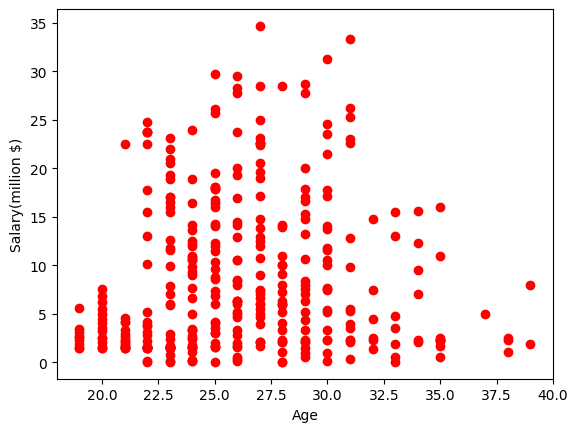

In [4]:
plt.scatter(nba['Age'], nba['2017_2018 Salary'] , c='r')
plt.ylabel("Salary(million $)")
plt.xlabel("Age")

Text(0.5, 0, 'Age')

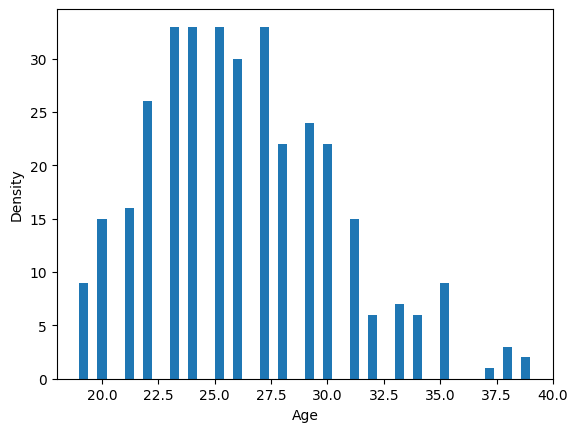

In [5]:
plt.hist(nba['Age'],bins=50)
plt.ylabel("Density")
plt.xlabel("Age")

Text(0.5, 0, 'Minutes per Game')

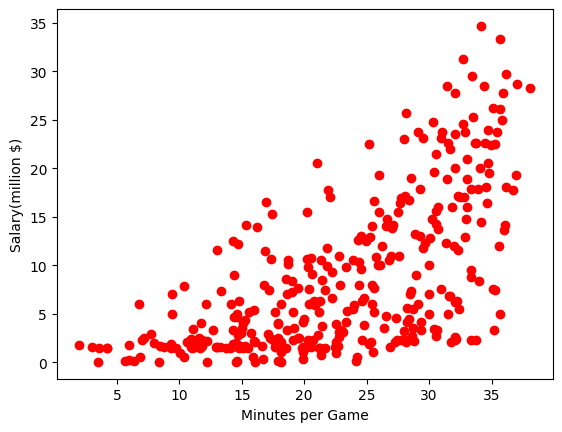

In [6]:
plt.scatter(nba['MPG'], nba['2017_2018 Salary'],c='r')
plt.ylabel("Salary(million $)")
plt.xlabel("Minutes per Game")

Text(0.5, 0, 'Minutes per Game')

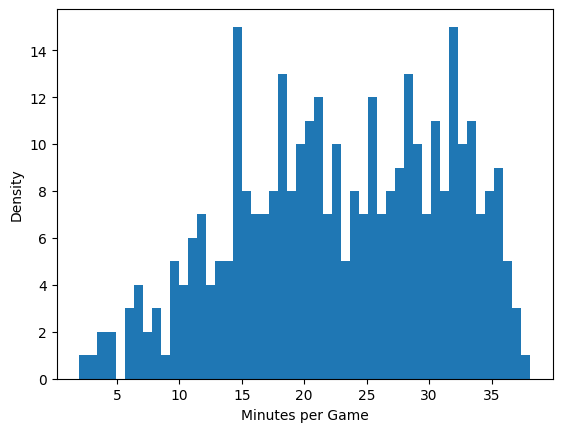

In [7]:
plt.hist(nba['MPG'],bins=50)
plt.ylabel("Density")
plt.xlabel("Minutes per Game")

Text(0.5, 0, 'Points per Game')

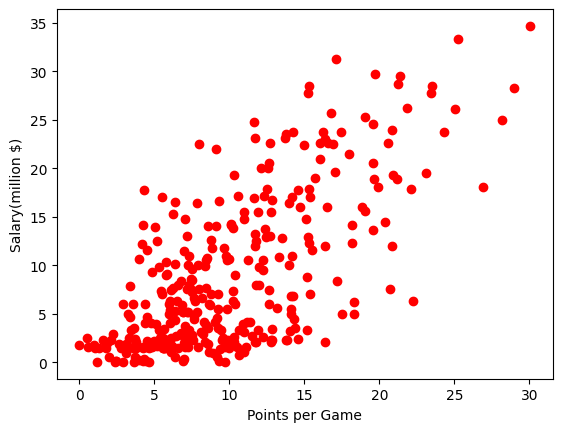

In [8]:
plt.scatter(nba['PPG'], nba['2017_2018 Salary'],c='r')
plt.ylabel("Salary(million $)")
plt.xlabel("Points per Game")

Text(0.5, 0, 'Points per Game')

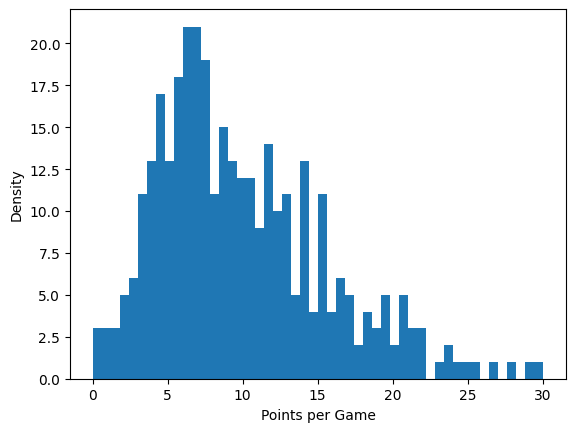

In [9]:
plt.hist(nba['PPG'],bins=50)
plt.ylabel("Density")
plt.xlabel("Points per Game")

Text(0.5, 0, 'Player Efficiency Rating')

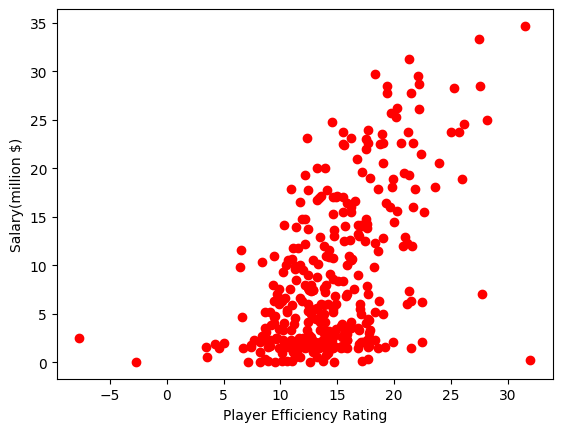

In [10]:
plt.scatter(nba['PER'], nba['2017_2018 Salary'],c='r')
plt.ylabel("Salary(million $)")
plt.xlabel("Player Efficiency Rating")

Text(0.5, 0, 'Player Efficiency Rating')

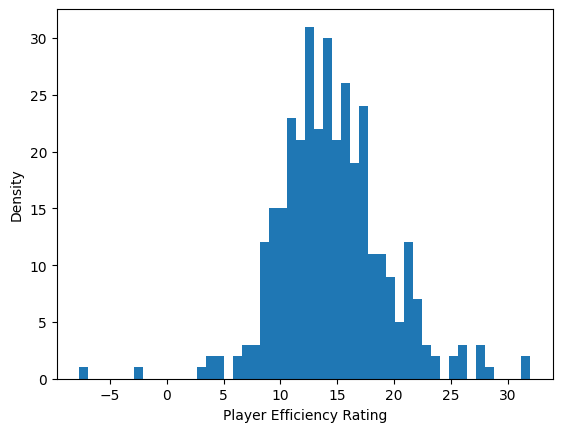

In [11]:
plt.hist(nba['PER'],bins=50)
plt.ylabel("Density")
plt.xlabel("Player Efficiency Rating")

Text(0.5, 0, 'Turnovers per Game')

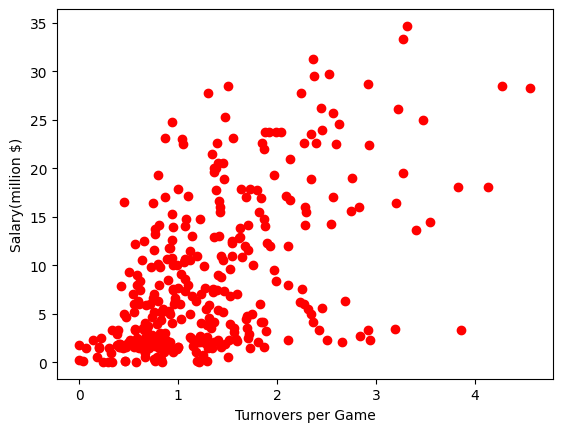

In [12]:
plt.scatter(nba['TOPG'], nba['2017_2018 Salary'],c='r')
plt.ylabel("Salary(million $)")
plt.xlabel("Turnovers per Game")

Text(0.5, 0, 'Turnovers per Game')

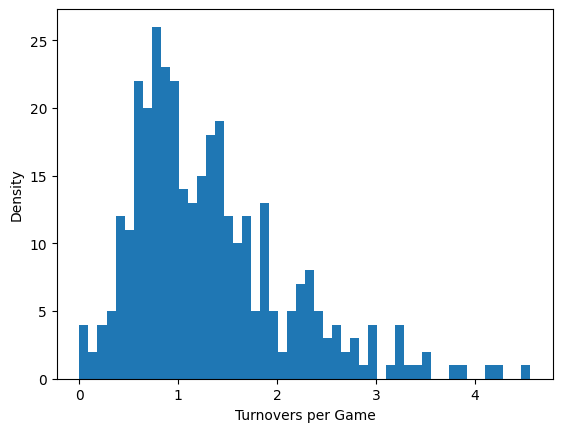

In [13]:
plt.hist(nba['TOPG'],bins=50)
plt.ylabel("Density")
plt.xlabel("Turnovers per Game")

Text(0.5, 0, 'Personal Fouls per Game')

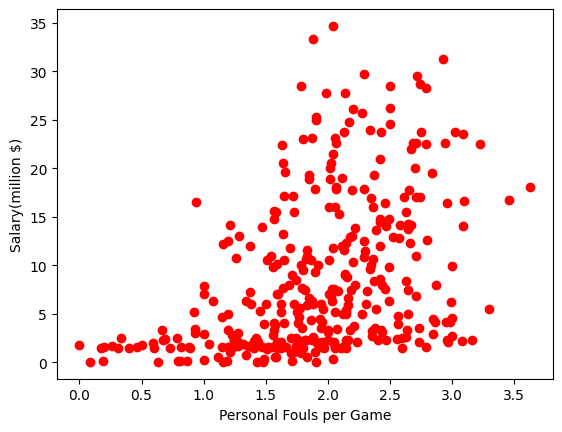

In [14]:
plt.scatter(nba['PFG'], nba['2017_2018 Salary'],c='r')
plt.ylabel("Salary(million $)")
plt.xlabel("Personal Fouls per Game")

Text(0.5, 0, 'Personal Fouls per Game')

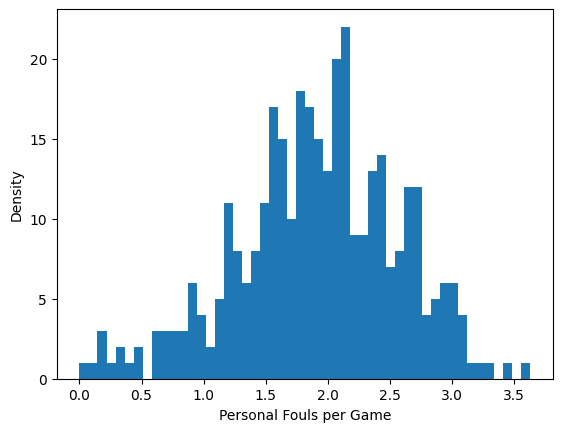

In [15]:
plt.hist(nba['PFG'],bins=50)
plt.ylabel("Density")
plt.xlabel("Personal Fouls per Game")

    Verilerde normal dağılıma yakınlık var, daha uygun olacağı düşüncesiyle z-score normalization uygulayacağım

In [17]:
def z_score_normalization(X):
    mu     = np.mean(X, axis=0)
    
    sigma  = np.std(X, axis=0)
   
    X_normalized = (X - mu) / sigma
    
    return X_normalized

In [19]:
temp_nba = nba.drop(columns=['Player', 'Stats_from'], axis=1)

columns = list(temp_nba)

columns

['Age', 'MPG', 'PPG', 'PER', 'TOPG', 'PFG', '2017_2018 Salary']

In [18]:
#nba df'indeki featureları normalize etmek

temp_nba = nba.drop(columns=['Player', 'Stats_from'], axis=1)

columns = list(temp_nba)

for i in columns:
    temp_nba[i] = z_score_normalization(temp_nba[i])
    
temp_nba

,Age,MPG,PPG,PER,TOPG,PFG,2017_2018 Salary
0,-0.287304,-0.963811,-0.834424,0.026657,-1.081728,-0.262381,-0.885161
1,-1.014346,0.263455,-0.348183,0.194631,-0.337766,1.331825,1.737947
2,0.924431,1.240197,0.510925,-0.771221,-0.205984,0.126687,-0.806942
3,0.197390,-0.994023,-0.699399,-0.162314,-0.506993,0.541693,-0.474272
4,0.197390,-1.143741,-0.787815,1.412445,-0.316834,0.611292,-0.178865
...,...,...,...,...,...,...,...
340,-0.771999,-1.615213,-1.090642,-0.981189,-0.645615,-1.814225,-0.915249
341,0.924431,-0.454942,-0.470467,-1.149164,-0.958740,-1.517006,-0.445188
342,0.197390,1.190077,0.916875,0.614567,0.683300,0.881372,0.768220
343,-0.771999,0.159638,-0.208376,0.320612,-0.486582,1.342569,0.488747


In [19]:
nba[['Age','MPG','PPG','PER','TOPG','PFG','2017_2018 Salary']] = temp_nba[['Age','MPG','PPG','PER','TOPG','PFG','2017_2018 Salary']]

nba

,Player,Stats_from,Age,MPG,PPG,PER,TOPG,PFG,2017_2018 Salary
0,Quincy Acy,2016.0,-0.287304,-0.963811,-0.834424,0.026657,-1.081728,-0.262381,-0.885161
1,Steven Adams,2016.0,-1.014346,0.263455,-0.348183,0.194631,-0.337766,1.331825,1.737947
2,Arron Afflalo,2016.0,0.924431,1.240197,0.510925,-0.771221,-0.205984,0.126687,-0.806942
3,Alexis Ajinca,2016.0,0.197390,-0.994023,-0.699399,-0.162314,-0.506993,0.541693,-0.474272
4,Cole Aldrich,2016.0,0.197390,-1.143741,-0.787815,1.412445,-0.316834,0.611292,-0.178865
...,...,...,...,...,...,...,...,...,...
340,Joe Young,2016.0,-0.771999,-1.615213,-1.090642,-0.981189,-0.645615,-1.814225,-0.915249
341,Nick Young,2016.0,0.924431,-0.454942,-0.470467,-1.149164,-0.958740,-1.517006,-0.445188
342,Thaddeus Young,2016.0,0.197390,1.190077,0.916875,0.614567,0.683300,0.881372,0.768220
343,Cody Zeller,2016.0,-0.771999,0.159638,-0.208376,0.320612,-0.486582,1.342569,0.488747


In [20]:
#regresyon uygulamak üzere dataframe'in son halini kaydetme
nba.to_csv("vised_zscaled_nba_stats_salaries_2017_2018.csv", index=False)